$x_1 + 8x_2 → max$

$
\left\{ \begin{array} \\
 5x_1 + 4x_2 <= 20 \\
 -x_1 + 9x_2 <= 27 \\
 x_1, x_2 >= 0
\end{array}\right.
$

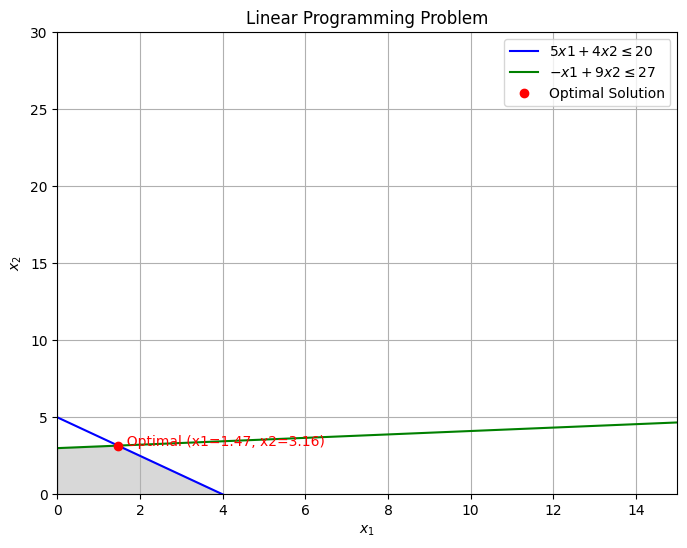

Optimal solution found:
x1 = 1.47
x2 = 3.16
Optimal value = 26.78


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Define the coefficients of the objective function
c = [-1, -8]

# Coefficients of the inequality constraints
A = [
    [5, 4],   # 5x1 + 4x2 <= 20
    [-1, 9]   # -x1 + 9x2 <= 27
]

# Right-hand side of the inequalities
b = [20, 27]

# Bounds for the variables
x1_bounds = (0, None)
x2_bounds = (0, None)

# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, bounds=[x1_bounds, x2_bounds], method='highs')

# Plot the constraints and feasible region
x = np.linspace(0, 15, 400)

# First constraint line: 5x1 + 4x2 <= 20
y1 = (20 - 5 * x) / 4

# Second constraint line: -x1 + 9x2 <= 27
y2 = (27 + 1 * x) / 9

# Feasible region
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label=r'$5x1 + 4x2 \leq 20$', color='blue')
plt.plot(x, y2, label=r'$-x1 + 9x2 \leq 27$', color='green')

# Shade the feasible region
plt.fill_between(x, np.minimum(y1, y2), 0, where=(y1 >= 0) & (y2 >= 0), color='gray', alpha=0.3)

# Plot the optimal solution
if result.success:
    plt.plot(result.x[0], result.x[1], 'ro', label='Optimal Solution')
    plt.text(result.x[0], result.x[1], f'  Optimal (x1={result.x[0]:.2f}, x2={result.x[1]:.2f})', color='red')

# Labels and legend
plt.xlim((0, 15))
plt.ylim((0, 30))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.title('Linear Programming Problem')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Display the result
if result.success:
    print("Optimal solution found:")
    print(f"x1 = {result.x[0]:.2f}")
    print(f"x2 = {result.x[1]:.2f}")
    print(f"Optimal value = {-result.fun:.2f}")  # Negate the result.fun to get the maximum value
else:
    print("No solution found.")